# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [291]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [292]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [293]:
#Your code here
#new_names = list(i.lower() for i in list(df.columns))
for i in df.columns:
    df = df.rename(columns = {i : i.lower().strip()})
    
df.columns
#df.head()


Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

# Change the Index to be the Line Names

In [294]:
#Your code here
df = df.set_index('linename', drop = False)
df.head()


,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
linename,,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Painstakingly change the index back

In [295]:
# Your code here
index_list = list(range(len(df)))
df['']=index_list
df = df.set_index('')
df.head()

#df.tail(10)

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
,,,,,,,,,,,
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [296]:
# Your code here
#df.exits[0:3]
Num_Lines = list(df.entries[i]-df.exits[i] for i in range(len(df)))

df['Num_Lines'] = Num_Lines_no
df = df.sort_values(by=['Num_Lines'], ascending = False)

#df['Num_Lines'] = df.Num_Lines_no.map(sort_f(Num_Lines_no))
df.head()
df.tail()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,Num_Lines
,,,,,,,,,,,,
190268,R622,R123,00-00-00,FRANKLIN AV,2345S,IRT,08/31/2018,04:00:00,REGULAR,264007496,2062560564,-1798553068
190269,R622,R123,00-00-00,FRANKLIN AV,2345S,IRT,08/31/2018,08:00:00,REGULAR,264006987,2062560511,-1798553524
190270,R622,R123,00-00-00,FRANKLIN AV,2345S,IRT,08/31/2018,12:00:00,REGULAR,264005881,2062560389,-1798554508
190271,R622,R123,00-00-00,FRANKLIN AV,2345S,IRT,08/31/2018,16:00:00,REGULAR,264005253,2062560190,-1798554937
190272,R622,R123,00-00-00,FRANKLIN AV,2345S,IRT,08/31/2018,20:00:00,REGULAR,264004708,2062559981,-1798555273


## Write a function to clean a column name.

In [297]:
def clean(col_name):
    cleaned = col_name.title()
    return cleaned

In [298]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [299]:
#Checking the output, we can see the results.
df.columns

Index(['C/A', 'Unit', 'Scp', 'Station', 'Linename', 'Division', 'Date', 'Time',
       'Desc', 'Entries', 'Exits', 'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

{0: 28254, 1: 28772, 2: 28203, 3: 28447, 4: 28101, 5: 27767, 6: 28081}


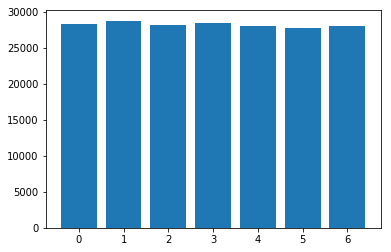

In [300]:
#Your code here
df.Date = pd.to_datetime(df.Date)
#print(df.Date.dtype)
#print(df.Date.dt.dayofweek.head())
#df.Date = df.Date.dt.dayofweek
#print(df.head())
#print(df.Date.value_counts(0))
#print(df.Date.dt.dayofweek.value_counts())
trafic_by_days = df.Date.dt.dayofweek.value_counts()
traffic_by_days = dict(trafic_by_days.sort_index())
print(traffic_by_days)
x = traffic_by_days.keys()
y = traffic_by_days.values()
plt.bar(x, y, label = 'subway traffic by day of the week')
plt.show()

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [301]:
#Your code here
import numpy as np
weekend_traffic = []
weekday_traffic = []
for i in traffic_by_days.keys():
    if i == 0 or i == 6:
        weekend_traffic.append(traffic_by_days[i])
    else:
        weekday_traffic.append(traffic_by_days[i])
print(weekend_traffic, weekday_traffic)
weekend_stats = [np.mean(weekend_traffic), np.std(weekend_traffic)]
weekday_stats = [np.mean(weekday_traffic), np.std(weekday_traffic)]
print(weekend_stats, weekday_stats)


[28254, 28081] [28772, 28203, 28447, 28101, 27767]
[28167.5, 86.5] [28258.0, 337.24531130914187]


# Drop a couple of columns

In [302]:
# Your code here
df = df.drop(['Desc','Num_Lines'], axis=1)


In [303]:
df.head()

,C/A,Unit,Scp,Station,Linename,Division,Date,Time,Entries,Exits
,,,,,,,,,,
104556,N601,R319,00-00-01,LEXINGTON AV/63,F,IND,2018-08-31,16:00:00,1758950823,45600895
104555,N601,R319,00-00-01,LEXINGTON AV/63,F,IND,2018-08-31,12:00:00,1758951379,45601562
104557,N601,R319,00-00-01,LEXINGTON AV/63,F,IND,2018-08-31,20:00:00,1758950151,45600452
104550,N601,R319,00-00-01,LEXINGTON AV/63,F,IND,2018-08-30,16:00:00,1758953033,45604064
104554,N601,R319,00-00-01,LEXINGTON AV/63,F,IND,2018-08-31,08:00:00,1758951563,45602775
